In [34]:
import pandas as pd #For reading the dataset and performing data munging 
import numpy as np # For performing cretain airthmetic operations
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting different graphs and plots

In [35]:
import os

#os.chdir("D:/Data Science_Competitions/AV_LTFS_DS/AV_LTFS_DataHackathon/Input")

Train = pd.read_csv("train_modified.csv")
Test= pd.read_csv("test_modified.csv")
Test['loan_default']=3
frames = [Train,Test]


DF= pd.concat(frames)

DF.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Employment.Type                         object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.A

In [36]:
Cols_change_category= ["branch_id","supplier_id","manufacturer_id","Current_pincode_ID"
                       ,"Employment.Type","State_ID","Employee_code_ID","MobileNo_Avl_Flag"
                       ,"Aadhar_flag","PAN_flag","VoterID_flag","Driving_flag","Passport_flag"
                       ,"PERFORM_CNS.SCORE.DESCRIPTION"]



for col in Cols_change_category:
    DF[col] = DF[col].astype('object',copy=False)


In [37]:
DF.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                               object
supplier_id                             object
manufacturer_id                         object
Current_pincode_ID                      object
Employment.Type                         object
State_ID                                object
Employee_code_ID                        object
MobileNo_Avl_Flag                       object
Aadhar_flag                             object
PAN_flag                                object
VoterID_flag                            object
Driving_flag                            object
Passport_flag                           object
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACCTS                          int64
PRI.ACTIVE.ACCTS                         int64
PRI.OVERDUE.A

In [38]:
print(DF.isnull().sum())

UniqueID                               0
disbursed_amount                       0
asset_cost                             0
ltv                                    0
branch_id                              0
supplier_id                            0
manufacturer_id                        0
Current_pincode_ID                     0
Employment.Type                        0
State_ID                               0
Employee_code_ID                       0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
PERFORM_CNS.SCORE.DESCRIPTION          0
PRI.NO.OF.ACCTS                        0
PRI.ACTIVE.ACCTS                       0
PRI.OVERDUE.ACCTS                      0
PRI.CURRENT.BALANCE                    0
PRI.SANCTIONED.AMOUNT                  0
PRI.DISBURSED.AM

In [39]:
variables = list(DF.drop(['Current_pincode_ID','Employee_code_ID','supplier_id','branch_id'],axis=1))

DF= DF[variables]


In [40]:
DF= pd.get_dummies(DF, prefix_sep='_', drop_first=True)

In [41]:
DF.dtypes

UniqueID                                                                                   int64
disbursed_amount                                                                           int64
asset_cost                                                                                 int64
ltv                                                                                      float64
PERFORM_CNS.SCORE                                                                          int64
PRI.NO.OF.ACCTS                                                                            int64
PRI.ACTIVE.ACCTS                                                                           int64
PRI.OVERDUE.ACCTS                                                                          int64
PRI.CURRENT.BALANCE                                                                        int64
PRI.SANCTIONED.AMOUNT                                                                      int64
PRI.DISBURSED.AMOUNT          

In [42]:
DF.shape

(345546, 83)

In [43]:
Test= DF[DF['loan_default']==3]

Train= DF[DF['loan_default']!=3]



In [44]:
Train.shape,Test.shape

((233154, 83), (112392, 83))

In [45]:
from sklearn.model_selection import train_test_split


variables1 = list(Train.drop(['UniqueID','loan_default'],axis=1))

X= Train[variables1]
y= Train["loan_default"]

X_Test=Test[variables1]

#X= pd.get_dummies(X, prefix_sep='_', drop_first=True)


X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=11)

In [46]:
# for col in Cols_change_category:
#     Test[col] = Test[col].astype('object',copy=False)

    
# X_Test= Test[variables]

# X_Test= pd.get_dummies(X_Test, prefix_sep='_', drop_first=True)
   

In [47]:
X_Test.shape, X_train.shape

((112392, 81), (186523, 81))

In [48]:
X_train.dtypes

disbursed_amount                                                                           int64
asset_cost                                                                                 int64
ltv                                                                                      float64
PERFORM_CNS.SCORE                                                                          int64
PRI.NO.OF.ACCTS                                                                            int64
PRI.ACTIVE.ACCTS                                                                           int64
PRI.OVERDUE.ACCTS                                                                          int64
PRI.CURRENT.BALANCE                                                                        int64
PRI.SANCTIONED.AMOUNT                                                                      int64
PRI.DISBURSED.AMOUNT                                                                       int64
SEC.NO.OF.ACCTS               

In [49]:
cols=X_train.columns
num_cols = X_train._get_numeric_data().columns

cat_cols=list(set(cols) - set(num_cols))


categorical_features_indices=sorted([X_train.columns.get_loc(c) for c in cat_cols if c in X_train])

categorical_features_indices

[]

In [50]:
from catboost import Pool, CatBoostClassifier, cv


valid_set= (X_validation,y_validation)



Cat = CatBoostClassifier(loss_function='Logloss',eval_metric="AUC",iterations=10,depth=10,random_seed=11
                         ,learning_rate=0.01)#,one_hot_max_size=31 

Cat_UnBal=Cat.fit(X_train,y_train,eval_set= valid_set
                  , use_best_model=True,cat_features=categorical_features_indices)


correct = y_validation



0:	test: 0.5956867	best: 0.5956867 (0)	total: 144ms	remaining: 1.3s
1:	test: 0.6094187	best: 0.6094187 (1)	total: 335ms	remaining: 1.34s
2:	test: 0.6095634	best: 0.6095634 (2)	total: 489ms	remaining: 1.14s
3:	test: 0.6135304	best: 0.6135304 (3)	total: 653ms	remaining: 980ms
4:	test: 0.6177386	best: 0.6177386 (4)	total: 812ms	remaining: 812ms
5:	test: 0.6182927	best: 0.6182927 (5)	total: 955ms	remaining: 637ms
6:	test: 0.6210398	best: 0.6210398 (6)	total: 1.11s	remaining: 477ms
7:	test: 0.6208239	best: 0.6210398 (6)	total: 1.26s	remaining: 316ms
8:	test: 0.6206493	best: 0.6210398 (6)	total: 1.42s	remaining: 158ms
9:	test: 0.6210808	best: 0.6210808 (9)	total: 1.57s	remaining: 0us

bestTest = 0.6210807828
bestIteration = 9



In [51]:
prediction_catboost = Cat_UnBal.predict_proba(X_validation)[:,1]

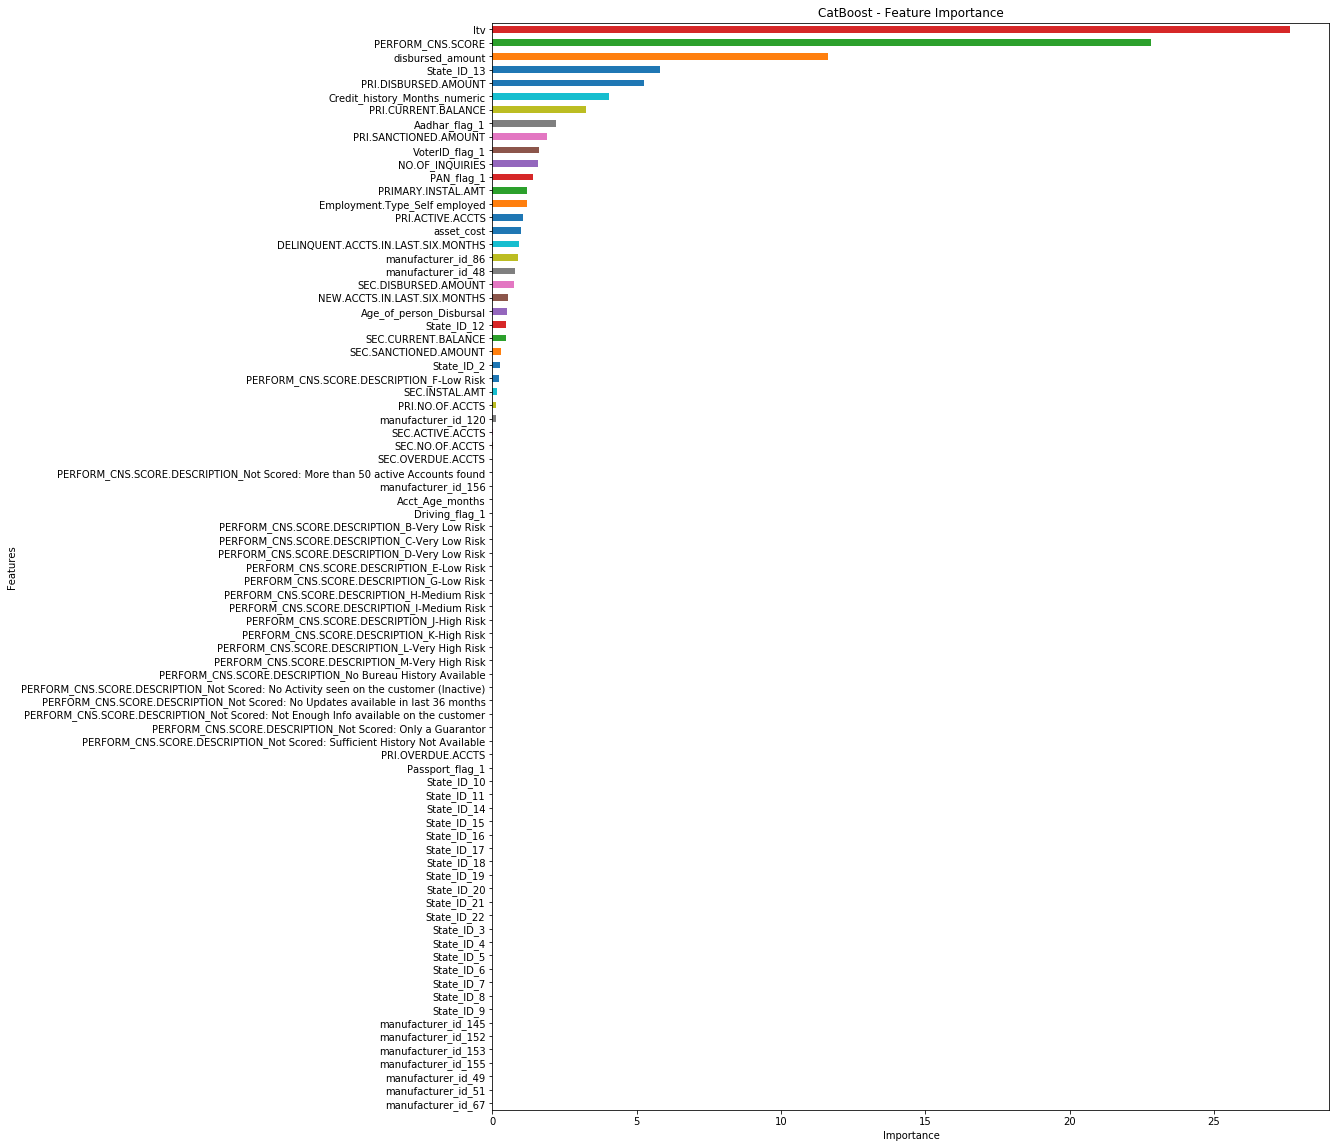

In [52]:
fea_imp = pd.DataFrame({'imp': Cat_UnBal.feature_importances_, 'col': X_train.columns})

fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])

fea_imp.plot(kind='barh', x='col', y='imp', figsize=(15, 20), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.show()

In [53]:
from sklearn.metrics import roc_auc_score


threshold= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

correct=y_validation

ROC_CatBoost= []


for i in threshold:
    prediction_catboost_class= np.where(prediction_catboost>= i,1,0)
    score= roc_auc_score(np.array(correct,dtype=int),prediction_catboost_class)
    print("The roc_auc_score of CatBoost model with Threshold",i,"is", score)
    ROC_CatBoost.append(score)

The roc_auc_score of CatBoost model with Threshold 0.1 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.2 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.3 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.4 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.5 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.6 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.7 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.8 is 0.5
The roc_auc_score of CatBoost model with Threshold 0.9 is 0.5


In [272]:
import time

Cat_Test_Prediction= Cat_UnBal.predict_proba(X_Test)[:, 1]

Threshold_Catboost=0.21
Cat_Test_class= np.where(Cat_Test_Prediction>= Threshold_Catboost,1,0)

Cat_Test_class_df= pd.DataFrame(Cat_Test_class)

Cat_Test_class_df.columns=['loan_default']

Cat_Test= pd.concat([Test["UniqueID"],Cat_Test_class_df],axis=1)


Time=time.strftime("%Y%m%d-%H%M%S")

Output_path= "D:/Data Science_Competitions/AV_LTFS_DS/AV_LTFS_DataHackathon/Output/"
Solution_Model="Solution_CatBoost_"+str(Threshold_Catboost)

Output_Catboost=Output_path +Solution_Model+"_"+Time+ ".csv"


Cat_Test.to_csv(Output_Catboost,index=False)

In [57]:
#!pip install scikit-optimize

In [64]:
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence
import time
import catboost


In [71]:
class ModelOptimizer:
    best_score = None
    opt = None
    
    def __init__(self, model, X_train, y_train, categorical_columns_indices=None, n_fold=3, seed=11, early_stopping_rounds=30, is_stratified=True, is_shuffle=True):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.categorical_columns_indices = categorical_columns_indices
        self.n_fold = n_fold
        self.seed = seed
        self.early_stopping_rounds = early_stopping_rounds
        self.is_stratified = is_stratified
        self.is_shuffle = is_shuffle
        
        
    def update_model(self, **kwargs):
        for k, v in kwargs.items():
            setattr(self.model, k, v)
            
    def evaluate_model(self):
        pass
    
    def optimize(self, param_space, max_evals=10, n_random_starts=2):
        start_time = time.time()
        
        @use_named_args(param_space)
        def _minimize(**params):
            self.model.set_params(**params)
            return self.evaluate_model()
        
        opt = gp_minimize(_minimize, param_space, n_calls=max_evals, n_random_starts=n_random_starts, random_state=2405, n_jobs=-1)
        best_values = opt.x
        optimal_values = dict(zip([param.name for param in param_space], best_values))
        best_score = opt.fun
        self.best_score = best_score
        self.opt = opt
        
        print('optimal_parameters: {}\noptimal score: {}\noptimization time: {}'.format(optimal_values, best_score, time.time() - start_time))
        print('updating model with optimal values')
        self.update_model(**optimal_values)
        plot_convergence(opt)
        return optimal_values

In [72]:
class CatboostOptimizer(ModelOptimizer):
    def evaluate_model(self):
        validation_scores = catboost.cv(
        catboost.Pool(self.X_train, 
                      self.y_train, 
                      cat_features=self.categorical_columns_indices),
        self.model.get_params(), 
        nfold=self.n_fold,
        stratified=self.is_stratified,
        seed=self.seed,
        early_stopping_rounds=self.early_stopping_rounds,
        shuffle=self.is_shuffle,
        #metrics='auc',
        plot=False)
        self.scores = validation_scores
        test_scores = validation_scores.iloc[:, 2]
        best_metric = test_scores.max()
        return 1 - best_metric

In [ ]:


cb = catboost.CatBoostClassifier(n_estimators=4000, # use large n_estimators deliberately to make use of the early stopping
                         one_hot_max_size=2,
                         loss_function='Logloss',
                         eval_metric='AUC',
                         boosting_type='Ordered', # use permutations
                         random_seed=11, 
                         use_best_model=True,
                         silent=True)

one_cb_optimizer = CatboostOptimizer(cb, X_train, y_train)
params_space = [Real(0.01, 0.8, name='learning_rate'), 
                Integer(2, 10, name='max_depth'), 
                Real(0.5, 1.0, name='colsample_bylevel'), 
                Real(1.0, 16.0, name='scale_pos_weight'), 
                Real(0.0, 100, name='bagging_temperature'), 
                Real(0.0, 100, name='random_strength'), 
                Real(1.0, 100, name='reg_lambda')]

one_cb_optimal_values = one_cb_optimizer.optimize(params_space, max_evals=40, n_random_starts=4)

In [ ]:
one_cb_optimizer.model.get_params()


In [29]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        X_train,X_validation=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_validation=y.iloc[train_indices],y.iloc[val_indices]

    model.fit(X=X_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(X_validation))
    test_pred=np.append(test_pred,model.predict(test))
    return test_pred.reshape(-1,1),train_pred


In [70]:
from sklearn.ensemble import RandomForestClassifier

model1 = RandomForestClassifier(random_state=11)

model1.fit(X_train, y_train)
val_pred1=model1.predict(X_validation)
test_pred1=model1.predict(X_Test)
val_pred1=pd.DataFrame(val_pred1)
test_pred1=pd.DataFrame(test_pred1)



from sklearn.ensemble import AdaBoostClassifier

model2 = AdaBoostClassifier(random_state=11)
model2.fit(X_train,y_train)
val_pred2=model2.predict(X_validation)
test_pred2=model2.predict(X_Test)
val_pred2=pd.DataFrame(val_pred2)
test_pred2=pd.DataFrame(test_pred2)



C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [93]:
val_pred1.columns=['val_pred1']
test_pred1.columns=['test_pred1']
val_pred2.columns=['val_pred2']
test_pred2.columns=['test_pred2']


In [152]:
vals=pd.concat([val_pred1,val_pred2],axis=1)

tests= pd.concat([test_pred1,test_pred2],axis=1)

In [153]:

X_validation.reset_index(drop=True, inplace=True)

X_Test.reset_index(drop=True, inplace=True)


vals.reset_index(drop=True, inplace=True)

tests.reset_index(drop=True, inplace=True)


In [154]:
df_val=X_validation.join(vals)

df_test=X_Test.join(tests)


In [155]:
X_validation.shape, val_pred1.shape,val_pred2.shape,df_val.shape

((46631, 3250), (46631, 1), (46631, 1), (46631, 3252))

In [156]:
X_Test.shape, test_pred1.shape,test_pred2.shape,df_test.shape

((112392, 3250), (112392, 1), (112392, 1), (112392, 3252))

In [157]:
df_val.head()

disbursed_amount  asset_cost    ltv  PERFORM_CNS.SCORE  PRI.NO.OF.ACCTS  \
0             48649       74100  67.48                  0                0   
1             72717      112869  66.36                  0                0   
2             59313       71103  85.79                  0                0   
3             43394       77031  58.42                  0                0   
4             53528       72450  75.16                  0                0   

   PRI.ACTIVE.ACCTS  PRI.OVERDUE.ACCTS  PRI.CURRENT.BALANCE  \
0                 0                  0                    0   
1                 0                  0                    0   
2                 0                  0                    0   
3                 0                  0                    0   
4                 0                  0                    0   

   PRI.SANCTIONED.AMOUNT  PRI.DISBURSED.AMOUNT    ...      \
0                      0                     0    ...       
1                      0                     0    ...       
2                      0                     0    ...       
3                      0                     0    ...       
4                      0                     0    ...       

   PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available  \
0                                                  1           
1                                                  1           
2                                                  1           
3                                                  1           
4                                                  1           

   PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found  \
0                                                  0                              
1                                                  0                              
2                                                  0                              
3                                                  0                              
4                                                  0                              

   PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive)  \
0                                                  0                                       
1                                                  0                                       
2                                                  0                                       
3                                                  0                                       
4                                                  0                                       

   PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months  \
0                                                  0                                  
1                                                  0                                  
2                                                  0                                  
3                                                  0                                  
4                                                  0                                  

   PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer  \
0                                                  0                                     
1                                                  0                                     
2                                                  0                                     
3                                                  0                                     
4                                                  0       

In [161]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(df_val,y_validation)

#model.score(df_test,y_test)


C:\Users\Prasad\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [166]:
Blend_val=model.predict_proba(df_val)[:,1]

Blend_val

array([0.24426387, 0.15199766, 0.30176248, ..., 0.24395545, 0.23513486,
       0.26990779])

In [167]:
from sklearn.metrics import roc_auc_score


threshold= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

correct=y_validation

ROC_Blend1= []


for i in threshold:
    Blend_val_class= np.where(Blend_val>= i,1,0)
    score= roc_auc_score(np.array(correct,dtype=int),Blend_val_class)
    print("The roc_auc_score of Blend model with Threshold",i,"is", score)
    ROC_Blend1.append(score)

The roc_auc_score of Blend model with Threshold 0.1 is 0.503586546379416
The roc_auc_score of Blend model with Threshold 0.2 is 0.5353738477993085
The roc_auc_score of Blend model with Threshold 0.3 is 0.5210417895432843
The roc_auc_score of Blend model with Threshold 0.4 is 0.5002056714573336
The roc_auc_score of Blend model with Threshold 0.5 is 0.5001206631483728
The roc_auc_score of Blend model with Threshold 0.6 is 0.5000987069390979
The roc_auc_score of Blend model with Threshold 0.7 is 0.5000493534695489
The roc_auc_score of Blend model with Threshold 0.8 is 0.5
The roc_auc_score of Blend model with Threshold 0.9 is 0.5


In [298]:
from rgf.sklearn import FastRGFClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

parameters_fast = {'max_leaf':[1000,2000],
              'loss': ['LOGISTIC'],'l1':[10.0],'l2':[1000.0],   
        'min_samples_leaf':[3],'n_estimators': [1000,2000,3000],'opt_algorithm':["rgf"]}


rgf = FastRGFClassifier(n_jobs=-1)

#kfolds = StratifiedKFold(5)

rgf = GridSearchCV(rgf, parameters_fast, scoring="roc_auc", cv=5,n_jobs=-1)


rgf_model= rgf.fit(X_train,y_train)


MemoryError: 

In [ ]:
if 1==1 :
     pd.DataFrame(rgf.cv_results_).to_csv('FastRF_Gridsearch_Results_Category.csv',index=False)

In [ ]:
FastRGF_Pred=rgf_model.predict_proba(X_validation)[:,1]

In [290]:
FastRGF_Pred

array([0.41437628, 0.38168438, 0.47316905, ..., 0.36178595, 0.43351677,
       0.34537382])

In [1]:
from sklearn.metrics import roc_auc_score


threshold= [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

correct=y_validation

ROC_RGF= []

 
for i in threshold:
    FastRGF_class= np.where(FastRGF_Pred>= i,1,0)
    score= roc_auc_score(np.array(correct,dtype=int),FastRGF_class)
    print("The ROC_AUC Score of Regularized Random forest model with Threshold",i,"is", score)
    ROC_RGF.append(score)

NameError: name 'y_validation' is not defined